<a href="https://colab.research.google.com/github/swapnil-mergal/Image-Enhancement-and-Feature-Extraction-for-Satellite-Data/blob/main/Image_Enhancement_and_Feature_Extraction_for_Satellite_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Install required libraries
!pip install opencv-python scikit-image matplotlib numpy seaborn

# Import necessary libraries
import os
import zipfile
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure, filters
from skimage.color import rgb2gray
from skimage.feature import canny
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a ZIP file


Saving archive (13).zip to archive (13).zip


In [4]:
from google.colab import drive
drive.mount('/content/drive')  # This mounts your Google Drive


Mounted at /content/drive


In [7]:
import zipfile
import os
from google.colab import files

# Upload the dataset ZIP file
uploaded = files.upload()

# Get the filename from the uploaded dictionary
zip_filename = list(uploaded.keys())[0]

# Define ZIP file path based on uploaded file
zip_path = "/content/" + zip_filename

# Extract dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/eurosat_data")  # Extract files

# Verify extraction
print("Extracted Files:", os.listdir("/content/eurosat_data"))

Saving archive (13).zip to archive (13) (1).zip
Extracted Files: ['EuroSAT_RGB']


In [16]:
import os

# List files inside the extracted folder
extracted_path = "/content/eurosat_data"
print("Extracted Files:", os.listdir(extracted_path))


Extracted Files: ['EuroSAT_RGB']


In [18]:
import os

# Check files inside the extracted EuroSAT_RGB folder
extracted_path = "/content/eurosat_data/EuroSAT_RGB"
print("Extracted Image Files:", os.listdir(extracted_path)[:10])  # Show first 10 files


Extracted Image Files: ['AnnualCrop', 'PermanentCrop', 'Forest', 'Industrial', 'River', 'HerbaceousVegetation', 'Highway', 'Residential', 'SeaLake', 'Pasture']


In [27]:
import os

# Choose a category (example: 'Forest')
category = "Forest"  # Change this to any folder name

# List images inside the chosen category
category_path = f"/content/eurosat_data/EuroSAT_RGB/{category}"
image_files = os.listdir(category_path)
print(f"Images in {category} category:", image_files[:10])  # Show first 10 images


Images in Forest category: ['Forest_1941.jpg', 'Forest_2590.jpg', 'Forest_189.jpg', 'Forest_367.jpg', 'Forest_2007.jpg', 'Forest_2666.jpg', 'Forest_1597.jpg', 'Forest_527.jpg', 'Forest_862.jpg', 'Forest_1100.jpg']


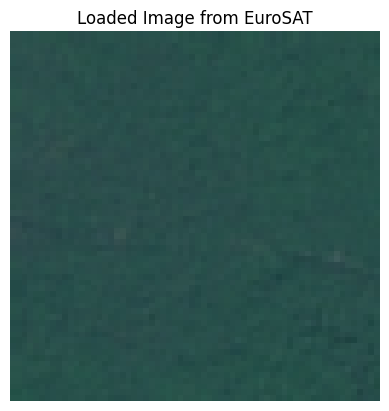

In [28]:
import cv2
import matplotlib.pyplot as plt

# Define the correct image path
image_path = f"/content/eurosat_data/EuroSAT_RGB/Forest/{image_files[0]}"  # Update category if needed

# Load and display the image
image = cv2.imread(image_path)
if image is None:
    print("❌ ERROR: Could not load image. Check the file path and name.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(image)
    plt.title("Loaded Image from EuroSAT")
    plt.axis("off")
    plt.show()


Available Categories: ['AnnualCrop', 'PermanentCrop', 'Forest', 'Industrial', 'River', 'HerbaceousVegetation', 'Highway', 'Residential', 'SeaLake', 'Pasture']


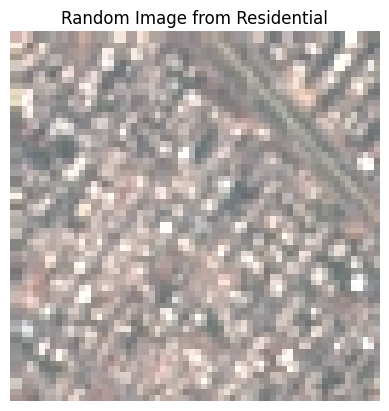

In [33]:
# List categories inside the dataset
dataset_path = "/content/eurosat_data/EuroSAT_RGB"
categories = os.listdir(dataset_path)
print("Available Categories:", categories)

# Select a random category and image
random_category = random.choice(categories)
category_path = os.path.join(dataset_path, random_category)

# Select a random image from that category
random_image = random.choice(os.listdir(category_path))
image_path = os.path.join(category_path, random_image)

# Load the selected image
image = cv2.imread(image_path)
if image is None:
    print("❌ ERROR: Could not load image. Check the file path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(image)
    plt.title(f"Random Image from {random_category}")
    plt.axis("off")
    plt.show()


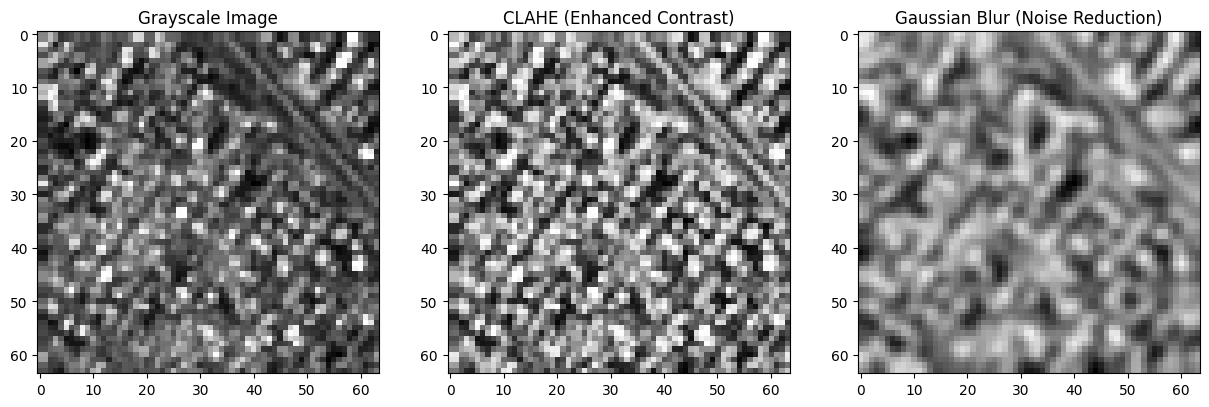

In [34]:
from skimage.color import rgb2gray

# Convert image to Grayscale
gray_image = rgb2gray(image)

# Apply CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply((gray_image * 255).astype(np.uint8))  # Convert to 8-bit

# Apply Gaussian Blur for Noise Reduction
gaussian_blur = cv2.GaussianBlur(clahe_image, (5,5), 0)

# Display Results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Grayscale Image")
ax[1].imshow(clahe_image, cmap='gray')
ax[1].set_title("CLAHE (Enhanced Contrast)")
ax[2].imshow(gaussian_blur, cmap='gray')
ax[2].set_title("Gaussian Blur (Noise Reduction)")
plt.show()


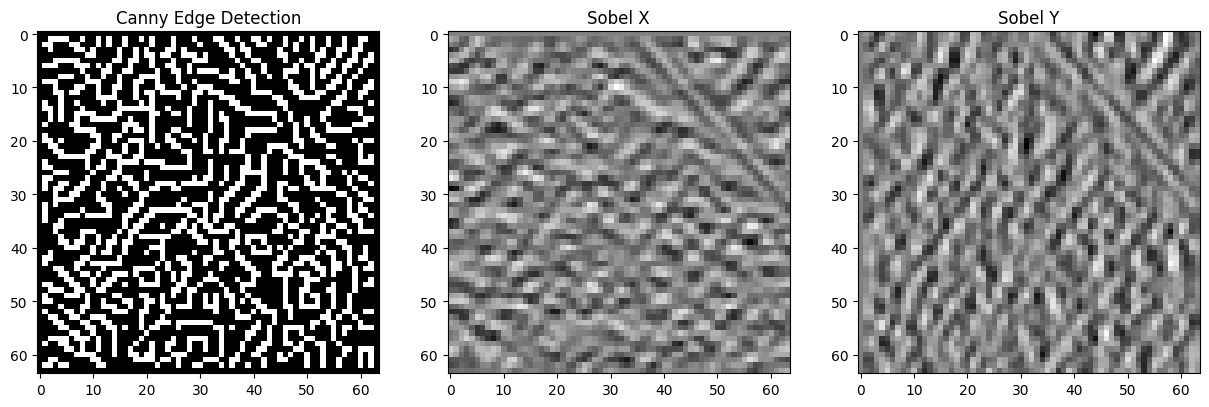

In [35]:
# Apply Canny Edge Detection
edges = canny(clahe_image, sigma=1.2)

# Apply Sobel Edge Detection
sobelx = filters.sobel_h(clahe_image)  # Horizontal edges
sobely = filters.sobel_v(clahe_image)  # Vertical edges
sobel_edges = np.hypot(sobelx, sobely)  # Combine both

# Display Edge Detection Results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(edges, cmap='gray')
ax[0].set_title("Canny Edge Detection")
ax[1].imshow(sobelx, cmap='gray')
ax[1].set_title("Sobel X")
ax[2].imshow(sobely, cmap='gray')
ax[2].set_title("Sobel Y")
plt.show()


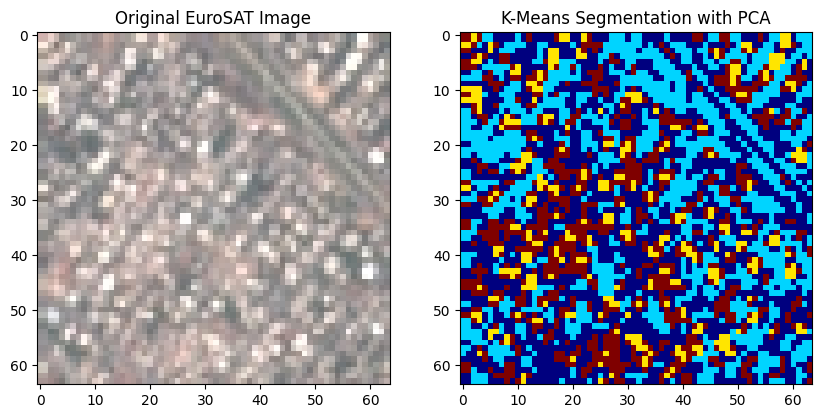

In [36]:
# Convert Image to 2D Feature Array
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Reduce Dimensionality with PCA
pca = PCA(n_components=2)  # Reduce to 2D for clustering
pixel_values_pca = pca.fit_transform(pixel_values)

# Apply K-Means Clustering
k = 4  # Number of land types (Urban, Water, Vegetation, Soil)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixel_values_pca)

# Reshape Labels Back to Image Shape
segmented_image = labels.reshape(image.shape[:2])

# Display Original vs Segmented Image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original EuroSAT Image")
ax[1].imshow(segmented_image, cmap='jet')
ax[1].set_title("K-Means Segmentation with PCA")
plt.show()


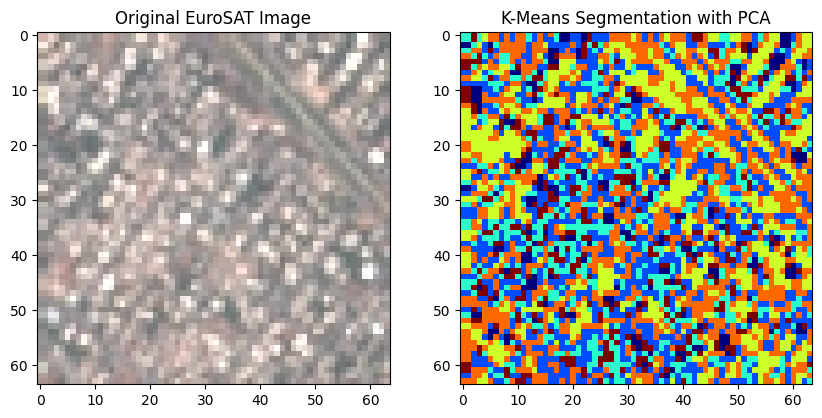

In [38]:
# Convert Image to 2D Feature Array
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Reduce Dimensionality with PCA
pca = PCA(n_components=2)  # Reduce to 2D for clustering
pixel_values_pca = pca.fit_transform(pixel_values)

# Apply K-Means Clustering
k = 6 # Number of land types (Urban, Water, Vegetation, Soil)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixel_values_pca)

# Reshape Labels Back to Image Shape
segmented_image = labels.reshape(image.shape[:2])

# Display Original vs Segmented Image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original EuroSAT Image")
ax[1].imshow(segmented_image, cmap='jet')
ax[1].set_title("K-Means Segmentation with PCA")
plt.show()


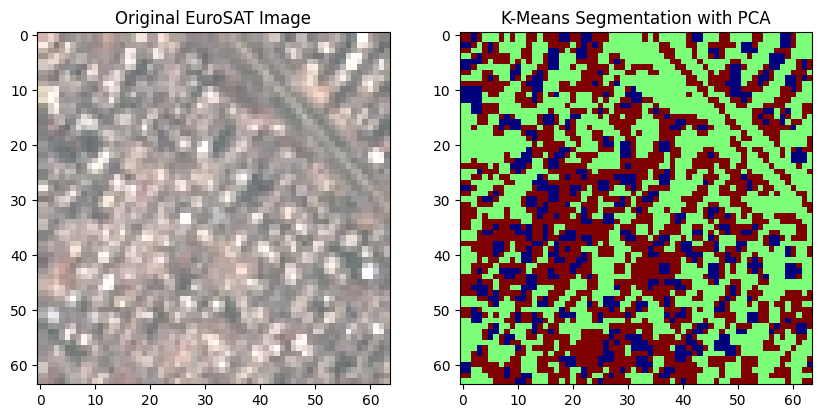

In [39]:
# Convert Image to 2D Feature Array
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Reduce Dimensionality with PCA
pca = PCA(n_components=2)  # Reduce to 2D for clustering
pixel_values_pca = pca.fit_transform(pixel_values)

# Apply K-Means Clustering
k = 3  # Number of land types (Urban, Water, Vegetation, Soil)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(pixel_values_pca)

# Reshape Labels Back to Image Shape
segmented_image = labels.reshape(image.shape[:2])

# Display Original vs Segmented Image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original EuroSAT Image")
ax[1].imshow(segmented_image, cmap='jet')
ax[1].set_title("K-Means Segmentation with PCA")
plt.show()
